Thoughts and notes:

The output will be dark matter relic density, which is best understood on a log scale. Hence we train on log(labels) and take e^(prediction).

Should split data set into about 70% training, 15% validation, and 15% test data.

Weirdness found in EWKino.csv so far:

1) These 9 columns ["mqL1", "muR", "mdR", "meL", "mmuL", "meR", "mmuR", "mtauL", "mtauR"] only contain the value 10,000. This is expected, simply drop them.
2) Both mu.png and M_2.png have identical bands missing from their middle, from about -50 to +50. Why?
3) mA.png has many fewer points close to zero than looks right.
4) At.png looks like it has a lense dense patch in the middle right. Is this deliberate?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("EWKino.csv")
df.head()

,M_1,M_2,mu,tan_beta,M_3,At,Ab,Atau,mA,mqL3,mtR,mbR,DM_relic_density
0,1560.24490,349.94913,186.18735,24.124987,3479.3865,1590.2957,1601.209700,1081.743300,4912.0930,3819.487549,4131.721680,3952.087891,-5.326717
1,-522.80970,1570.04090,1124.30020,53.791900,3061.1643,-1350.6636,-1404.245500,-994.927600,3118.7231,3301.162000,2776.762700,3695.325000,1.449269
2,172.97008,-745.21200,1359.60730,57.938282,1728.2530,-5696.1333,545.506160,24.962122,3305.7607,2813.633301,4003.136963,4367.008301,1.673351
3,1623.43970,-1723.02620,1090.89770,32.386284,1630.1871,4101.4453,-1718.224000,65.495240,3006.8293,2036.975342,2438.649902,4546.547363,-1.864330
4,-697.36725,293.05150,644.81195,16.532715,3666.4736,-3613.6165,-20.668911,-50.025227,1793.0931,2961.550781,2560.102539,2433.652100,-5.979536


In [ ]:
full_df = df[["M_1", "M_2", "mu", "tan_beta", "M_3", "At", "Ab", "Atau", "mA", "mqL3", "mtR", "mbR", "DM_relic_density"]]
full_df.DM_relic_density = np.log(full_df.DM_relic_density)
full_df.head()

/tmp/ipykernel_1425/339005838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df.DM_relic_density = np.log(full_df.DM_relic_density)


,M_1,M_2,mu,tan_beta,M_3,At,Ab,Atau,mA,mqL3,mtR,mbR,DM_relic_density
0,-191.78204,1546.65420,464.17776,21.946095,4467.1616,7964.2593,-996.21590,-1833.5303,4799.62350,3953.6410,4136.0884,4439.0024,-0.150823
1,508.58246,-1485.52060,-845.79706,45.249397,2966.3315,7814.7046,1948.92920,1869.5571,914.76697,2074.7473,3877.8281,3648.5361,-1.527858
2,256.92212,-586.74084,827.61096,44.627483,2525.1646,-7629.4720,-886.47943,1569.5186,3707.04800,4660.5483,3552.7420,2651.8157,0.703098
3,1414.03080,1839.58840,1488.70280,34.970398,2217.5942,1812.8965,561.58276,-1885.2010,2538.65480,2316.7524,4820.9746,4380.9146,-0.949331
4,907.39870,1121.29700,364.57916,24.084797,4698.1206,-4202.6980,101.66391,-1358.2156,3297.12600,4534.0107,4456.1587,4051.9758,-3.927137


In [118]:
def normalise_columns(df):
    # Normalise all columns in a dataframe
    
    mean = df.mean(axis=0)
    std = df.std(axis=0)
    df -= mean
    df /= std
    
    return df

In [ ]:
normalised_df = normalise_columns(full_df)
normalised_df.head()

,M_1,M_2,mu,tan_beta,M_3,At,Ab,Atau,mA,mqL3,mtR,mbR,DM_relic_density
0,-0.163322,1.309159,0.413973,-0.637074,1.260126,1.673452,-0.850722,-1.594264,1.546654,0.492936,0.674689,1.092633,0.537862
1,0.465560,-1.227660,-0.769158,0.858496,-0.040698,1.642131,1.708754,1.605653,-1.567052,-1.689172,0.374511,0.180370,0.143351
2,0.239585,-0.475711,0.742216,0.818582,-0.423073,-1.592321,-0.755355,1.346384,0.670956,1.313923,-0.003339,-0.969927,0.782504
3,1.278593,1.554238,1.339295,0.198806,-0.689655,0.385181,0.503082,-1.638913,-0.265509,-1.408112,1.470737,1.025594,0.309095
4,0.823671,0.953291,0.324019,-0.499815,1.460306,-0.874657,0.103390,-1.183534,0.342404,1.166965,1.046709,0.645972,-0.544025


In [ ]:
"""
DM_relic_density is saved as log(original-values) as the model will be trained to predict log(DM_relic_density).
This produced EWKino-train.csv and EWKino-test.csv, each a random sample of the full EWKino.csv file.
Train will be used to train the model with 70% of the full EWKino file and test will never be touched except to test final models with 15% of the full EWKino file.
"""

shuffled = full_df.sample(frac=1)
shuffled = shuffled.reset_index(drop=True) # remove previous indices
test = shuffled.loc[:1841]
train = shuffled.loc[1842:]
print(test.shape)
print(train.shape)
#test.to_csv("EWKino_test.csv", index=False)
#train.to_csv("EWKino_train.csv", index=False)

(1842, 13)
(10438, 13)


In [ ]:
def plot_scatter_from_df(df, column_name):
    #Takes as input a pandas.dataframe and a column name, and plots the numerical values in that column in a scatter plot.
    
    # Extract the values from the specified column
    values = df[column_name]
    
    # Create the scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(range(len(values)), values, s=0.1)
    
    # Add labels and title
    plt.xlabel("Index")
    plt.ylabel(column_name)
    plt.title(f"Scatter Plot of '{column_name}' Column")
    
    # Save the plot
    # plt.savefig(f"plots/{column_name}.png")
    
    # Show the plot
    plt.show()

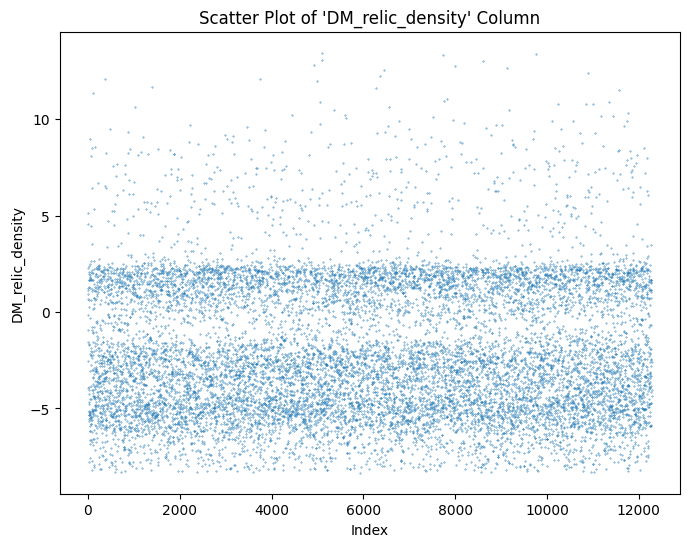

In [155]:
plot_scatter_from_df(full_df, "DM_relic_density")

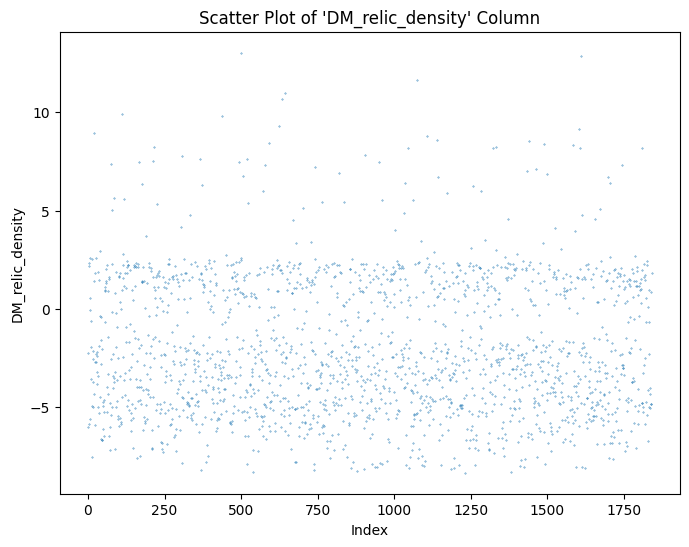

In [156]:
test = pd.read_csv("EWKino_test.csv")
plot_scatter_from_df(test, "DM_relic_density")

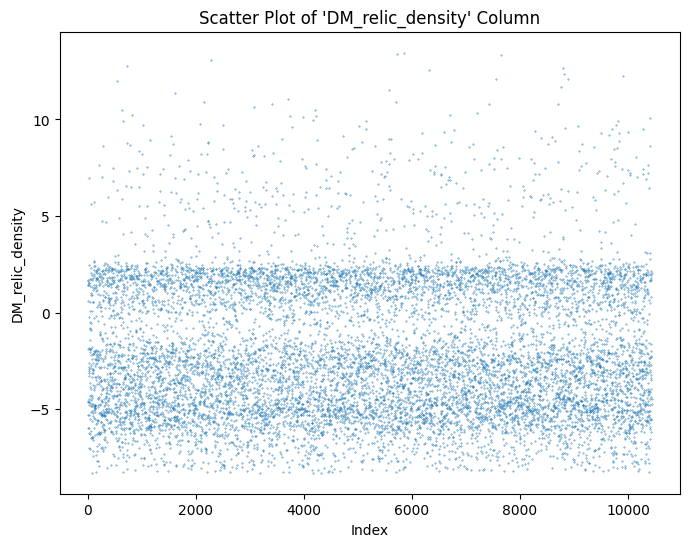

In [158]:
train = pd.read_csv("EWKino_train.csv")
plot_scatter_from_df(train, "DM_relic_density")